<a href="https://colab.research.google.com/github/Kishore-C-Dev/ML-AI/blob/main/ML/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-11-26 17:03:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.207, 142.250.98.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   212MB/s    in 0.8s    

2024-11-26 17:03:34 (212 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
#!pip uninstall -y tensorflow
#!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_10_percent'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/train
There are 0 directories and 75 images in 10_food_classes_10_percent/train/hamburger
There are 0 directories and 75 images in 10_food_classes_10_percent/train/pizza
There are 0 directories and 75 images in 10_food_classes_10_percent/train/grilled_salmon
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ramen
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_wings
There are 0 directories and 75 images in 10_food_classes_10_percent/train/sushi
There are 0 directories and 75 images in 10_food_classes_10_percent/train/steak
There are 0 directories and 75 images in 10_food_classes_10_percent/train/fried_rice
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_curry
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ice_cream
There are 10 director

In [ ]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
print(hub.__version__)

2.15.0
0.16.1


In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path('10_food_classes_10_percent/train')
class_names=np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape : (512, 512, 3)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[180, 150, 122],
        [175, 145, 117],
        [175, 145, 117],
        ...,
        [197, 107,  72],
        [196, 106,  71],
        [198, 108,  73]],

       [[148, 118,  94],
        [142, 112,  86],
        [142, 112,  88],
        ...,
        [203, 114,  80],
        [205, 115,  81],
        [203, 114,  80]],

       [[119,  90,  72],
        [111,  83,  62],
        [110,  81,  63],
        ...,
        [194, 108,  75],
        [197, 108,  76],
        [192, 106,  73]],

       ...,

       [[ 82,  56,  65],
        [ 94,  69,  75],
        [ 99,  74,  78],
        ...,
        [156,  37,  31],
        [158,  35,  30],
        [157,  34,  29]],

       [[ 81,  56,  62],
        [ 90,  65,  71],
        [ 96,  71,  75],
        ...,
        [164,  45,  39],
        [157,  34,  29],
        [150,  27,  22]],

       [[ 83,  58,  64],
        [ 88,  63,  67],
        [ 95,  70,  74],
        ...,
        [162,  43,  3

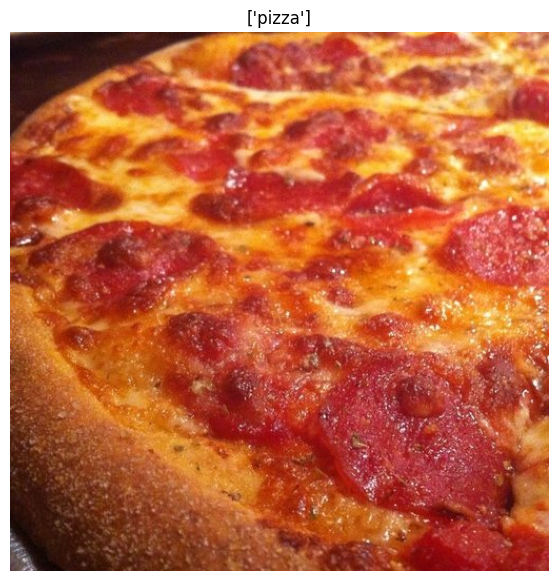

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

def view_random_image(target_dir) :
    plt.figure(figsize=(7,7))
    target_dir=target_dir
    random_dir=random.sample(os.listdir(target_dir),1)
    class_dir=target_dir+"/"+random_dir[0]
    random_image=random.sample(os.listdir(class_dir),1)
    #print(random_image)
    random_image_path=class_dir+"/"+random_image[0]
    img=mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(random_dir)
    plt.axis("off")
    print(f"Image shape : {img.shape}")
    return img
tensor_img=tf.constant(view_random_image(target_dir="10_food_classes_10_percent/train"))
tensor_img

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

test_dataset=image_dataset_from_directory(directory='10_food_classes_10_percent/test',
                                          image_size=(224, 224),  # Resize images
                                          batch_size=32, # Batch size
                                          seed=42,
                                          label_mode='categorical'
                                          )

train_dataset=image_dataset_from_directory(directory='10_food_classes_10_percent/train',
                                          image_size=(224, 224),  # Resize images
                                          batch_size=32, # Batch size
                                          seed=42,
                                          label_mode='categorical'
                                          )

test_dataset.file_paths

Found 2500 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


['10_food_classes_10_percent/test/ice_cream/482965.jpg',
 '10_food_classes_10_percent/test/hamburger/2825993.jpg',
 '10_food_classes_10_percent/test/hamburger/2103408.jpg',
 '10_food_classes_10_percent/test/sushi/1485536.jpg',
 '10_food_classes_10_percent/test/pizza/1475479.jpg',
 '10_food_classes_10_percent/test/fried_rice/318375.jpg',
 '10_food_classes_10_percent/test/pizza/2236338.jpg',
 '10_food_classes_10_percent/test/sushi/3365273.jpg',
 '10_food_classes_10_percent/test/chicken_wings/982894.jpg',
 '10_food_classes_10_percent/test/sushi/814819.jpg',
 '10_food_classes_10_percent/test/chicken_wings/726396.jpg',
 '10_food_classes_10_percent/test/chicken_curry/959641.jpg',
 '10_food_classes_10_percent/test/grilled_salmon/3498508.jpg',
 '10_food_classes_10_percent/test/hamburger/3043581.jpg',
 '10_food_classes_10_percent/test/fried_rice/3193475.jpg',
 '10_food_classes_10_percent/test/grilled_salmon/3428781.jpg',
 '10_food_classes_10_percent/test/ice_cream/3686074.jpg',
 '10_food_classe

In [ ]:
def normalize_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

train_dataset_normalized = train_dataset.map(normalize_images)
test_dataset_normalized = test_dataset.map(normalize_images)

train_dataset_normalized_repeat = train_dataset_normalized.prefetch(buffer_size=tf.data.AUTOTUNE).repeat()
test_dataset_normalized_repeat = test_dataset_normalized.prefetch(buffer_size=tf.data.AUTOTUNE).repeat()


In [ ]:
#TensorBoard call-back
import datetime

def tensorboard_callback(dir_name,experiment_name):
    log_dir=dir_name+"/"+experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to : {log_dir}")
    return tensorboard_callback




In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
resnet_url='https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2'
efficientnet_url='https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-feature-vector/2'





In [ ]:
def create_model(model_url, num_classes=10):

  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224,3)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url, num_classes=10)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
history_resnetmodel = resnet_model.fit(train_dataset_normalized,
          epochs=5,
          steps_per_epoch=len(train_dataset),
          validation_data=test_dataset_normalized,validation_steps=len(test_dataset),callbacks=[tensorboard_callback(dir_name='tensorboard_logs',experiment_name='resnet')])

Saving TensorBoard log files to : tensorboard_logs/resnet/20241126-170426
Epoch 1/5
24/24 [==============================] - 23s 629ms/step - loss: 1.9021 - accuracy: 0.3467 - val_loss: 1.1748 - val_accuracy: 0.6216
Epoch 2/5
24/24 [==============================] - 10s 401ms/step - loss: 0.9001 - accuracy: 0.7453 - val_loss: 0.8527 - val_accuracy: 0.7260
Epoch 3/5
24/24 [==============================] - 13s 531ms/step - loss: 0.6275 - accuracy: 0.8307 - val_loss: 0.7581 - val_accuracy: 0.7552
Epoch 4/5
24/24 [==============================] - 10s 394ms/step - loss: 0.4827 - accuracy: 0.8680 - val_loss: 0.6866 - val_accuracy: 0.7800
Epoch 5/5
24/24 [==============================] - 9s 386ms/step - loss: 0.3769 - accuracy: 0.9107 - val_loss: 0.6621 - val_accuracy: 0.7840


In [ ]:
test_loss, test_accuracy = resnet_model.evaluate(train_dataset_normalized, batch_size=32)

24/24 [==============================] - 3s 85ms/step - loss: 0.3240 - accuracy: 0.9400


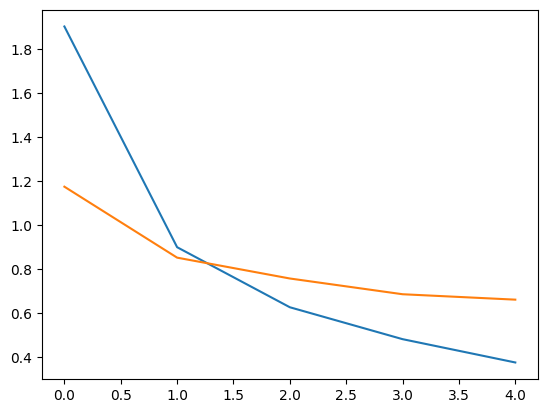

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history_resnetmodel.history['loss'], label='train_loss')
plt.plot(history_resnetmodel.history['val_loss'], label='val_loss')

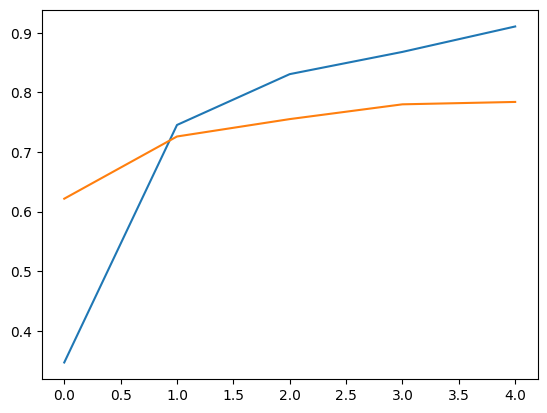

In [ ]:

plt.figure()
plt.plot(history_resnetmodel.history['accuracy'], label='train_accuracy')
plt.plot(history_resnetmodel.history['val_accuracy'], label='val_accuracy')

In [ ]:
efficient_model=create_model(efficientnet_url,num_classes=10)
efficient_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])



In [ ]:

efficient_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [ ]:
history_efficient_model = efficient_model.fit(train_dataset_normalized,
          epochs=5,
          steps_per_epoch=len(train_dataset),
          validation_data=test_dataset_normalized,validation_steps=len(test_dataset),callbacks=[tensorboard_callback(dir_name='tensorboard_logs',experiment_name='resnet')])

Saving TensorBoard log files to : tensorboard_logs/resnet/20241125-204933
Epoch 1/5
24/24 [==============================] - 18s 423ms/step - loss: 1.9714 - accuracy: 0.3600 - val_loss: 1.4869 - val_accuracy: 0.6360
Epoch 2/5
24/24 [==============================] - 11s 475ms/step - loss: 1.2976 - accuracy: 0.6933 - val_loss: 1.1105 - val_accuracy: 0.7164
Epoch 3/5
24/24 [==============================] - 13s 528ms/step - loss: 1.0060 - accuracy: 0.7600 - val_loss: 0.9489 - val_accuracy: 0.7376
Epoch 4/5
24/24 [==============================] - 8s 338ms/step - loss: 0.8433 - accuracy: 0.7933 - val_loss: 0.8565 - val_accuracy: 0.7556
Epoch 5/5
24/24 [==============================] - 7s 276ms/step - loss: 0.7373 - accuracy: 0.8280 - val_loss: 0.8000 - val_accuracy: 0.7616


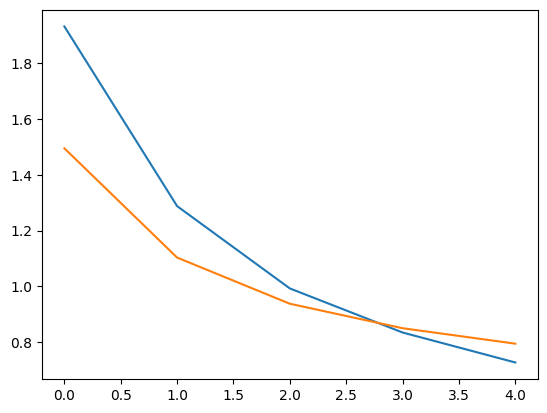

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history_efficient_model.history['loss'], label='train_loss')
plt.plot(history_efficient_model.history['val_loss'], label='val_loss')

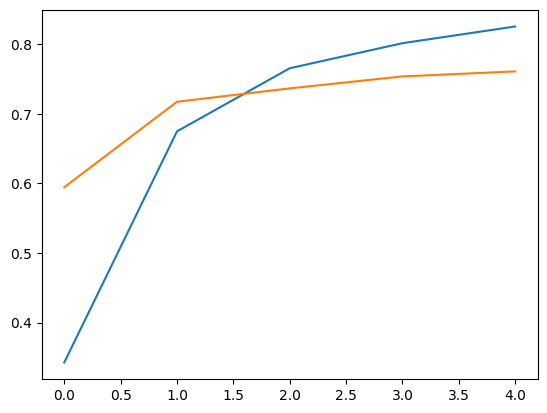

In [ ]:
plt.figure()
plt.plot(history_efficient_model.history['accuracy'], label='train_accuracy')
plt.plot(history_efficient_model.history['val_accuracy'], label='val_accuracy')

1/1 [==============================] - 0s 37ms/step
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  3.0722592e-16 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1051799e-26]]
index: 2
100.00% Confidence This Is fried_rice


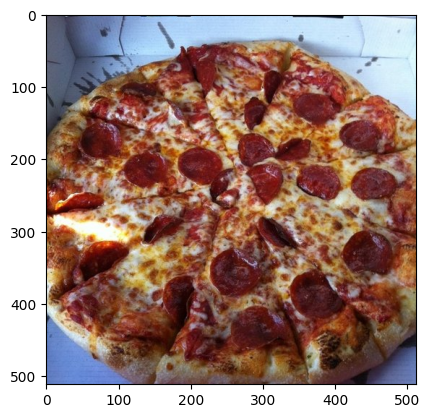

In [ ]:
from matplotlib.pyplot import imshow, show
import numpy as np
from PIL import Image
import os
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def names(number):
        print(f"index: {number}")
        return class_names[number]

# Dossiers contenant les images
paths = [
    '/content/10_food_classes_10_percent/test/fried_rice/'
]

for folder in paths:
    i=0
    for file in os.listdir(folder):
        if file.endswith('.jpg'):
            i+=1
            if(i==2) :
                break
            img_path = os.path.join(folder, file)
            img = Image.open('pizza.jpg').convert('RGB')
            x = np.array(img.resize((224, 224)))
            x = x.reshape(1, 224, 224, 3)
            res = resnet_model.predict(x)

            print(res)
            classification = np.where(res == np.amax(res))[1][0]

            imshow(img)
            print(f"{res[0][classification] * 100:.2f}% Confidence This Is {names(classification)}")
            show()

